In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import os
import pandas as pd
import scipy
#from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
OUTDIR = "pdfs/"

Populating the interactive namespace from numpy and matplotlib


This notebook contains code to generate the following results from Zheng et al 2020:

* ED Figure 5: singletons

In [3]:
factors = ["BHLHE40", "CEBPB", "CTCF", "E2F4", "EBF1", "ELF1", "ELK1", "ETS1", "FOS", "IRF4", "JunD", "Max", "MEF2A", "MEF2C", "Mxi1", "NFIC", "NFKB", "NFYA", "NFYB", "Nrf1", "NRSF", "PAX5", "PBX3", "POU2F2", "PU1", "RFX5", "RUNX3", "SP1", "SRF", "STAT1", "STAT3", "TCF3", "USF1", "USF2", "YY1", "ZBTB33", "ZEB1", "Znf143"]
rank_perc = [950, 990, 995]

factordata = {}
#DIR="/storage/pandaman/project/singletons/AgentBind/"
DIR = "/gymreklab-tscc/pandaman/AgentBind-research-results-IMPORTANT/singletons/AgentBind"

# load data
for f in factors:
    print(f)
    fdata = pd.read_csv(os.path.join(DIR, f, "factor_singletons_r2.tab"), sep="\t", skiprows=1,
                            names=["chrom","start", "end", "ref", "AC", "AN",
                                   "raw.score","snr.score","rank","core"])
    fdata = fdata[~np.isnan(fdata["raw.score"])]
    fdata = fdata[~np.isnan(fdata["snr.score"])]
    fdata["factor"] = f
    factordata[f] = fdata

# Set singleton definition
for f in factors:
    factordata[f]["sing"] = (factordata[f]["AC"] == 1) | \
        ((factordata[f]["AN"] - factordata[f]["AC"]) == 1)

BHLHE40
CEBPB
CTCF
E2F4
EBF1
ELF1
ELK1
ETS1
FOS
IRF4
JunD
Max
MEF2A
MEF2C
Mxi1
NFIC
NFKB
NFYA
NFYB
Nrf1
NRSF
PAX5
PBX3
POU2F2
PU1
RFX5
RUNX3
SP1
SRF
STAT1
STAT3
TCF3
USF1
USF2
YY1
ZBTB33
ZEB1
Znf143


In [4]:
data = []

for f in factors:
    d = []
    fd = factordata[f]
    
    # Get pval for core
    p_all = np.mean(fd["sing"])
    p_core = np.mean(fd[fd["core"]>0]["sing"])
    n_all = fd.shape[0]
    n_core = fd[fd["core"]>0].shape[0]
    d = [f, p_all, p_core, n_all, n_core]
    n_not_core = n_all-n_core
    p_not_core = (p_all*n_all-p_core*n_core)/(n_not_core)
    se_core = np.sqrt(p_all*(1-p_all)*(1.0/n_core+1.0/n_not_core))
    pval_core = 1-scipy.stats.norm.cdf((p_core-p_not_core)/se_core)
    d.append(pval_core)
    
    for i in range(len(rank_perc)):
        rk = (fd[fd["rank"]>=rank_perc[i]]["sing"])
        p_rk = np.mean(rk)
        diff_p_rk = p_rk - p_all
        err_rk = np.sqrt(p_rk*(1-p_rk)/len(rk))
        n_rk = len(rk)
        n_not_rk = n_all-n_rk
        p_not_rk = (p_all*n_all-np.sum(rk))*1.0/n_not_rk
        # Compute pvals
        se_rk = np.sqrt(p_all*(1-p_all)*(1.0/n_rk+1.0/n_not_rk))
        pval_rk = 1-scipy.stats.norm.cdf((p_rk-p_not_rk)/se_rk)
        # Add data
        d.extend([p_rk, diff_p_rk, err_rk, pval_rk, len(rk)])
    data.append(d)

cols = ["factor","sing.all","sing.core","n.all","n.core","pval.core"]
for i in range(len(rank_perc)):
    cols.extend(["sing.rank.%s"%rank_perc[i], "diff.rank.%s"%rank_perc[i], 
                 "sing.rank.%s.err"%rank_perc[i], "pval.rank.%s"%rank_perc[i],
                "num.%s"%rank_perc[i]])
results = pd.DataFrame(data, columns=cols)
results["sing.all.err"] = results.apply(lambda x: np.sqrt(x["sing.all"]*(1-x["sing.all"])/x["n.all"]), 1)
results["sing.core.err"] = results.apply(lambda x: np.sqrt(x["sing.core"]*(1-x["sing.core"])/x["n.core"]), 1)

In [5]:
results[["factor","sing.all","sing.rank.950","sing.rank.990","sing.rank.995"]]

,factor,sing.all,sing.rank.950,sing.rank.990,sing.rank.995
0,BHLHE40,0.517967,0.512558,0.509529,0.526512
1,CEBPB,0.501229,0.487938,0.513158,0.554140
2,CTCF,0.500505,0.498960,0.510973,0.513720
3,E2F4,0.533711,0.541804,0.553598,0.545794
4,EBF1,0.502538,0.505588,0.507981,0.504640
5,ELF1,0.518138,0.522381,0.520525,0.526535
6,ELK1,0.529899,0.539708,0.554763,0.545200
7,ETS1,0.524732,0.541484,0.536842,0.540275
8,FOS,0.507340,0.554217,0.500000,0.692308
9,IRF4,0.502341,0.497069,0.498012,0.511236


In [6]:
results[["factor","sing.all","sing.rank.950","sing.rank.990","sing.rank.995"]][results["sing.all"]> results["sing.rank.995"]]

,factor,sing.all,sing.rank.950,sing.rank.990,sing.rank.995
18,NFYB,0.503355,0.489146,0.491858,0.495833
23,POU2F2,0.504661,0.504384,0.517274,0.501789
29,STAT1,0.518643,0.528345,0.541667,0.466667
31,TCF3,0.506568,0.508778,0.501538,0.505816
32,USF1,0.510356,0.515246,0.510209,0.492964
33,USF2,0.513102,0.509857,0.501115,0.476517
36,ZEB1,0.514087,0.516812,0.515106,0.507666


/storage/resources/source/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


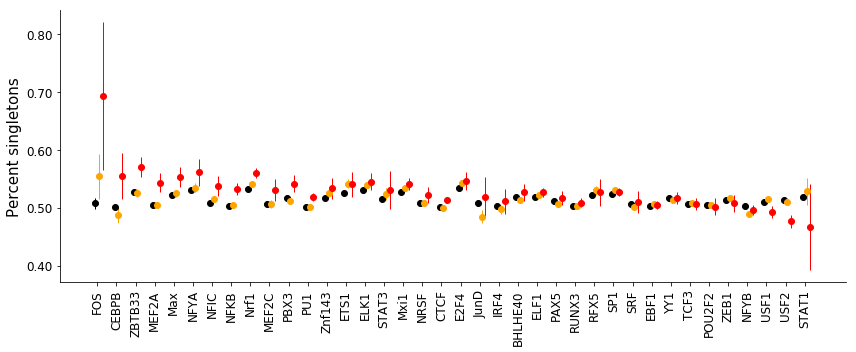

In [7]:
results = results.sort_values("diff.rank.995", ascending=False)
xvals = np.array(range(results.shape[0]))

w = 0.1
fig = plt.figure()
fig.set_size_inches((12, 5))
ax = fig.add_subplot(111)
ax.errorbar(xvals, results["sing.all"], label="All", yerr=results["sing.all.err"], marker="o", linewidth=0, elinewidth=1, color="black")
#ax.errorbar(xvals+w, results["sing.core"], label="core", yerr=results["sing.core.err"], marker="o", linewidth=0, elinewidth=1, color="g")

i=0
x = rank_perc[i]
lab = "Rank"
ax.errorbar(xvals+w*(2+i), results["sing.rank.%s"%x], label=lab, yerr=results["sing.rank.%s.err"%x], marker="o", linewidth=0, elinewidth=1, color="orange")

i=2
x = rank_perc[i]
ax.errorbar(xvals+w*(2+i), results["sing.rank.%s"%x], label=lab, yerr=results["sing.rank.%s.err"%x], marker="o", linewidth=0, elinewidth=1, color="red")
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks(xvals+w)
ax.set_xticklabels(results["factor"], rotation=90, size=12, fontname="Arial");
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12, fontname="Arial")
#ax.legend(loc="upper left")
ax.set_ylabel("Percent singletons", size=15, fontname="Arial")
plt.tight_layout()
fig.savefig(os.path.join(OUTDIR, "singleton_950_995.pdf"))

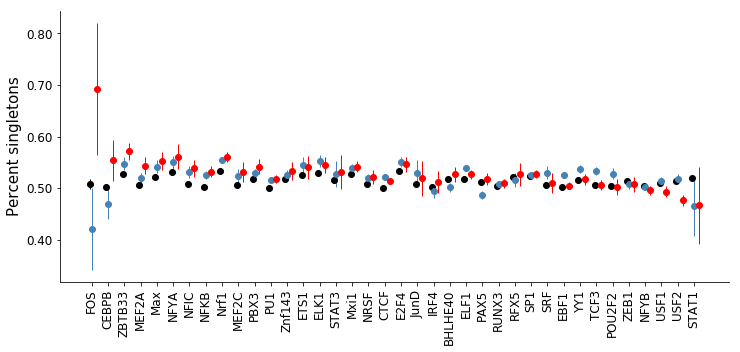

In [8]:
results = results.sort_values("diff.rank.995", ascending=False)
xvals = np.array(range(results.shape[0]))

w = 0.1
fig = plt.figure()
fig.set_size_inches((12, 5))
ax = fig.add_subplot(111)
ax.errorbar(xvals, results["sing.all"], label="All", yerr=results["sing.all.err"], marker="o", linewidth=0, elinewidth=1, color="black")
ax.errorbar(xvals+w, results["sing.core"], label="core", yerr=results["sing.core.err"], marker="o", linewidth=0, elinewidth=1, color="steelblue")
lab = True
for i in [2]:
    x = rank_perc[i]
    if not lab:
        lab = "Rank"
    else:
        lab = ""
    ax.errorbar(xvals+w*(2+i), results["sing.rank.%s"%x], label=lab, yerr=results["sing.rank.%s.err"%x], marker="o", linewidth=0, elinewidth=1, color="red")
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks(xvals+w)
ax.set_xticklabels(results["factor"], rotation=90, size=12);
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
#ax.legend(loc="upper left")
ax.set_ylabel("Percent singletons", size=15);
fig.savefig(os.path.join(OUTDIR, "singleton_995_core.pdf"))